<a href="https://colab.research.google.com/github/KarltonBotics/MNA-IA-Equipos51/blob/main/MNA_IAyAA_semana_7_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Inteligencia Artificial y Aprendizaje Automático**
### Tecnológico de Monterrey
### Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 7**
### **Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Nombres y matrículas de los integrantes del equipo:**

*   Carlos Enríquez Gorgonio A01793102
*   Fernando Ramírez Gómez A01298109
*   Francisco Javier Ramírez Arias A01316379
*   Jessica Lechuga Ramos A01793512
*   Moisés Rangel Silva A00143704

Esta Tarea se deberá resolver en equipos, de acuerdo a como fueron integrados al inicio del curso. 

El artículo del 2016 de Moro, Rita & Vala relacionado al presente problema lo encuentras aquí: https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104  
 
Y el conjunto de datos utilizado es el de la siguiente liga de la UCI: https://archive.ics.uci.edu/ml/datasets/Facebook+metrics 


El archivo se llama dataset_Facebook.csv y contiene 500 registros y 19 columnas.  El objetivo es determinar el impacto generado por un anuncio de una marca de cosméticos en  Facebook, en el cual se intentaron varias variantes en la manera de mostrar el anuncio. Siguiendo el  artículo, deberás considerar como predictores o variables de entrada aquellas que se indican en la Tabla 3. Por otro lado, en la Tabla 2, los autores consideran varios casos para la variable de salida, intentando  determinar cuál puede ser el mejor caso para medir el éxito de la campaña. Para este ejercicio deberás  considerar únicamente los siguientes tres casos como variable de salida: “Lifetime post consumers”,  “Lifetime People who have liked a Page and engaged with a post” y “Likes”.

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

### DATA
El data set, con 500 resgistros, es una muestra de los datos recopilados entre enero 1 y diciembre 31 de 2014. Contiene 19 columnas, de las cuales 7 features son conocidos antes de la publicación del anuncio (post) y los otros 12 features son usados para evaluar el impacto del post.

Los 12 features consisten en 11 features exportados de la página de Facebook más una columna que computa el total de interacciones (pgae total likes), y contienen las métricas asociadas al desempeño del post, por lo tanto, cualquiera de estos features pueden ser usados como feature de salida para predicción.

Los otros 7 features son considerados de entrada. Estos a su vez fueron limpiados y ajustados, eliminando el 'post id', 'post message', 'permanent link', pues no dan valor al modelo, y asjustando la fecha, 'posted', a tres características: 'Post Month', 'Post Weekday', y 'Post Hour'.

El conjunto de datos se divide en cuatro categorías o tipos de features, según la información que proveen:
* de Identificación: permiten identificar, de manera individual, cada post.
* de Contenido: el contenido textual de cada post.
* de Categorización: features que caracterizan el post.
* de Desempeño: métricas para medir el impacto del post (o el impacto de la página, para el caso de "Page total likes").





##### Features de Salida
Feature                   | Desciption
--------------------------|---------------------------
Lifetime post total reach | The number of people who saw a page post (unique users).
Lifetime post total impressions | Impressions are the number of times a post from a page is displayed, whether the post is clicked or not. People may see multiple impressions of the same post. For example, someone might see a Page update in News Feed once, and then a second time if a friend shares it.
Lifetime engaged users | The number of people who clicked anywhere in a post (unique users).
Lifetime post consumers | The number of people who clicked anywhere in a post.
Lifetime post consumptions | The number of clicks anywhere in a post.
Lifetime post impressions by people who have liked a page | Total number of impressions just from people who have liked a page.
Lifetime post reach by people who like a page | The number of people who saw a page post because they have liked that page (unique users).
**Lifetime people who have liked a page and engaged with a post** | The number of people who have liked a Page and clicked anywhere in a post (Unique users).
Comments | Number of comments on the publication.
Likes | Number of “Likes” on the publication.
Shares | Number of times the publication was shared.
Total interactions | The sum of “likes,” “comments,” and “shares” of the post.
<br>

##### Features de Entrada

Feature                   | Desciption
--------------------------|---------------------------
Category | Manual content characterization: action (special offers and contests, product (direct advertisement, explicit brand content), and inspiration non-explicit brand related content).
Page total likes | Number of people who have liked the company's page.
Type | Type of content (Link, Photo, Status, Video).
Post month | Month the post was published (January, February, March, …, December).
Post hour | Hour the post was published (0, 1, 2, 3, 4, …, 23).
Post weekday | Weekday the post was published (Sunday, Monday, …, Saturday).
Paid | If the company paid to Facebook for advertising (yes, no).
<br>


### Librerías

In [55]:
# Módulos, librerías y paquetes requeridos.

import graphviz
import math
import matplotlib.pyplot as plt
import pandas as pd
import pydotplus
import seaborn as sns
import missingno as msno
import numpy as np

from IPython.display import Image
from sklearn import tree
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, KFold, train_test_split, cross_validate, learning_curve
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# **Ejercicio-1.** 

En esta tarea considera únicamente la siguiente variable de salida que se concluye que es una de las 
mejores en el artículo antes citado:  ‘Lifetime People who have liked a Page and engaged with a 
post'. Renombra dicha variable como “LPE” . Como variables de entrada selecciona las 7 variables 
que indican los autores en la Tabla 3 del artículo citado. 

In [56]:
# Importación de archivo a DataFrame
df= pd.read_csv('https://raw.githubusercontent.com/KarltonBotics/MNA-IA-Equipos51/main/dataset_Facebook.csv', sep=';')
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [57]:
# Sustituye los nombres de las columnas para una mejor interacción.
df.rename(columns = {
    'Page total likes': 'total_likes',
    'Type': 'type',
    'Category': 'category',
    'Post Month': 'post_month',
    'Post Weekday': 'post_weekday',
    'Post Hour': 'post_hour',
    'Paid': 'paid',
    'Lifetime Post Total Reach': 'lptr',
    'Lifetime Post Total Impressions': 'lpti',
    'Lifetime Engaged Users': 'leu',
    'Lifetime Post Consumers': 'lpcm',
    'Lifetime Post Consumptions': 'lpcn',
    'Lifetime Post Impressions by people who have liked your Page': 'lpiplp',
    'Lifetime Post reach by people who like your Page': 'lprplp',
    'Lifetime People who have liked your Page and engaged with your post': 'lpe',
    'comment': 'comment',
    'like': 'like',
    'share': 'share',
    'Total Interactions': 'interactions'
}, inplace = True)
# El inplace true, nos permite hacer la mutación sobre el mismo dataframe, sin necesidad de crear otro nuevo
df.head()

,total_likes,type,category,post_month,post_weekday,post_hour,paid,lptr,lpti,leu,lpcm,lpcn,lpiplp,lprplp,lpe,comment,like,share,interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [58]:
# Determinamos las columnas del conjunto de entrada
X = df[['category', 'total_likes', 'type', 'post_month', 'post_weekday', 'post_hour', 'paid']].copy()
print("Columnas X")
print(X.head())

# Determinamos las columnas del conjunto de salida
y = df[['lpe']].copy()
print("\nColumnas y")
print(y.head())

Columnas X
   category  total_likes    type  post_month  post_weekday  post_hour  paid
0         2       139441   Photo          12             4          3   0.0
1         2       139441  Status          12             3         10   0.0
2         3       139441   Photo          12             3          3   0.0
3         2       139441   Photo          12             2         10   1.0
4         2       139441   Photo          12             2          3   0.0

Columnas y
    lpe
0   119
1  1108
2   132
3  1386
4   396


# **Ejercicio-2.**

Realiza una partición de los datos con 100 datos de Prueba y el resto para Entrenamiento y 
Validación.  

In [59]:
# Creamos nuestros datos de validación con la función trains_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=10)

print("Tamaño del conjunto de entrada para Entrenamiento y Validación: ", X_train.shape)
print("Tamaño del conjunto de entrada para Prueba: ", X_test.shape)
print("-----")
print("Tamaño del conjunto de salida para Entrenamiento y Validación: ", y_train.shape)
print("Tamaño del conjunto de salida para Prueba: ", y_test.shape)

Tamaño del conjunto de entrada para Entrenamiento y Validación:  (400, 7)
Tamaño del conjunto de entrada para Prueba:  (100, 7)
-----
Tamaño del conjunto de salida para Entrenamiento y Validación:  (400, 1)
Tamaño del conjunto de salida para Prueba:  (100, 1)


# **Ejercicio-3.**

Definirás tus propias funciones de errores para este problema de regresión. Los errores que 
utilizarás son la raíz cuadrada del error cuadrático medio RMSE, el error absoluto medio MAE y el 
error porcentual absoluto medio MAPE. 

In [60]:
# Raíz del error cuadrático medio
def rmse(y, y_hat):
    substraction = (y - y_hat)
    square = np.square(substraction)
    MSE = square.mean()
    RMSE = np.sqrt(MSE)

    return RMSE

In [61]:
# Error absoluto medio
def mae(y, y_hat):
    absolute = np.abs(y - y_hat)
    average = np.mean(absolute)

    return average

In [62]:
# Error absoluto medio porcentual
def mape(y, y_hat):
    absolute = np.abs((y - y_hat) / y)
    average = np.mean(absolute)
    percentage = average * 100

    return percentage

# **Ejercicio-4.**

En la página de la UCI, así como en el artículo de los autores previamente citado encuentras información en relación al significado de cada variable. Haz una análisis de tus datos y lleva a cabo las transformaciones que consideres adecuadas tanto en los datos de entrada, como en las de salida. Utiliza un Pipeline para evitar el filtrado de información. 

In [63]:
# Función que grafica un histograma de acuerdo con los parámetros predefinidos
def plot_hist(X_train_data):
  # Tamaño de la figura
  sns.set(rc={'figure.figsize':(12,4)})
  len_col = len(X_train_data.columns)
  # Ventana de 1x3 nichos para incluir en cada uno de ellos un gráfico.
  fig, axes = plt.subplots(1, len_col)
  for k in range(0,len_col):
    plt.subplot(1, len_col, k+1)
    # X_train_data.columns devuelve una lista con los nombres de las columnas.
    plt.hist(X_train_data[X_train_data.columns[k]], bins=20)
    plt.xlabel(X_train_data.columns[k])
  plt.show()

  X_train_data.describe()

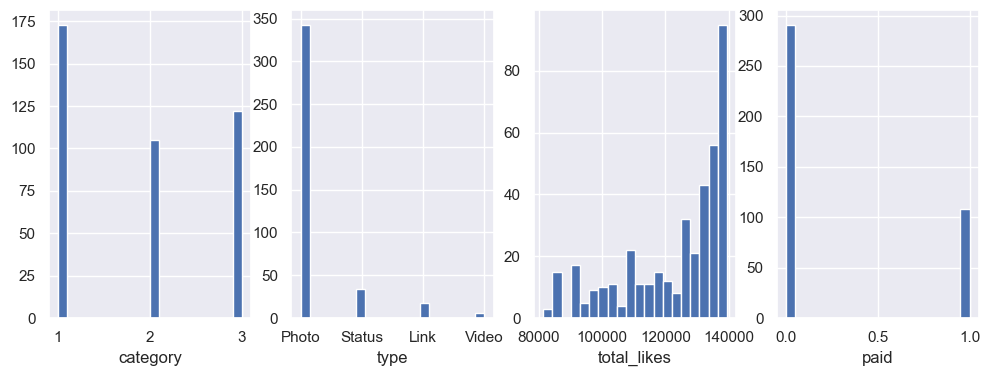

In [64]:
# Histograma de las variables de entrada
plot_hist(X_train[['category', 'type', 'total_likes', 'paid']])

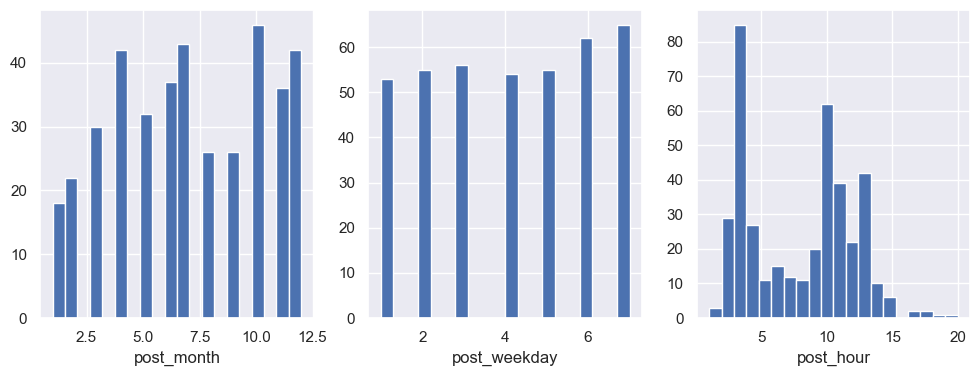

In [65]:
# Histograma de las variables de entrada
plot_hist(X_train[['post_month', 'post_weekday', 'post_hour']])

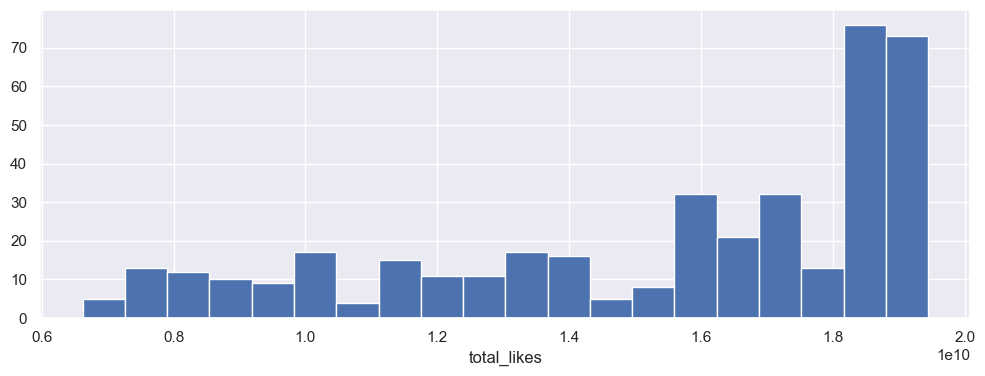

In [107]:
# Eliminar....
plot_hist((X_train[['total_likes']])**2)

In [68]:
# Columnas categóricas: type, category
df_name_cate = ['type', 'category']
# Columnas ordinales o discretas cuantitativas: post_month, post_weekday, post_hour
df_name_ord = ['post_month','post_weekday','post_hour']
# Columnas numéricas o cuantitativas: total_likes
df_name_num = ['total_likes']
# Columnas binarias: paid
df_name_bin = ['paid']

In [69]:
# Muestra de los valores de los datos categóricos
for n in df_name_cate:
  print(n + ": ", X_train[n].unique())

type:  ['Photo' 'Status' 'Link' 'Video']
category:  [3 2 1]


In [70]:
# Muestra de los valores de los datos ordinales
for n in df_name_ord:
  print(n + ": ", X_train[n].unique())

post_month:  [ 6 10  5  7  4 11  2  1 12  8  3  9]
post_weekday:  [4 1 5 3 7 2 6]
post_hour:  [ 2  4  9 11 13  1  8  3 12  6 10  5 17 20 15 14  7 18 19]


In [108]:
# Muestra de los valores de los datos numéricos
for n in df_name_num:
  print(n + ": ", X_train[n].unique())

total_likes:  [124940 136736 116435 119198 136013 120050 129600 111620 117764 138185
  92079 131728  91330  85979 138458 123047 130791 125612 132201 137020
  91651  98195 100732 137893 134879 109670 126345 135195 137177 136393
 115368 138329 138895  92721 139441 137059  91223 135713  93470 131630
  96749 121540 136642 133594 107907  92507 135700 106928 131808 128032
 126424 135617  86909 116091 113028 132817 133679 138414 102112  93149
 126141 135428  91865 133451 138353  81370  91437  92400  92614  92828
  93042 131956  86491  92186  85093  92935  91544 127082 104070 131300
  93577 115893  91972  93256  92293  91116]


In [71]:
# Muestra de los valores de los datos binarios
for n in df_name_bin:
  print(n + ": ", X_train[n].unique())

paid:  [ 0.  1. nan]


In [72]:
# Búsqueda de los datos nulos en los datos de entrada
X_train.isnull().sum()

category        0
total_likes     0
type            0
post_month      0
post_weekday    0
post_hour       0
paid            1
dtype: int64

In [73]:
# Búsqueda de los datos nan en los datos de entrada
X_train.isna().any()

category        False
total_likes     False
type            False
post_month      False
post_weekday    False
post_hour       False
paid             True
dtype: bool

In [74]:
# Búsqueda de los datos nulos en los datos de salida
y_train.isnull().sum()

lpe    0
dtype: int64

In [75]:
# Búsqueda de los datos nan en los datos de salida
y_train.isna().any()

lpe    False
dtype: bool

<AxesSubplot: >

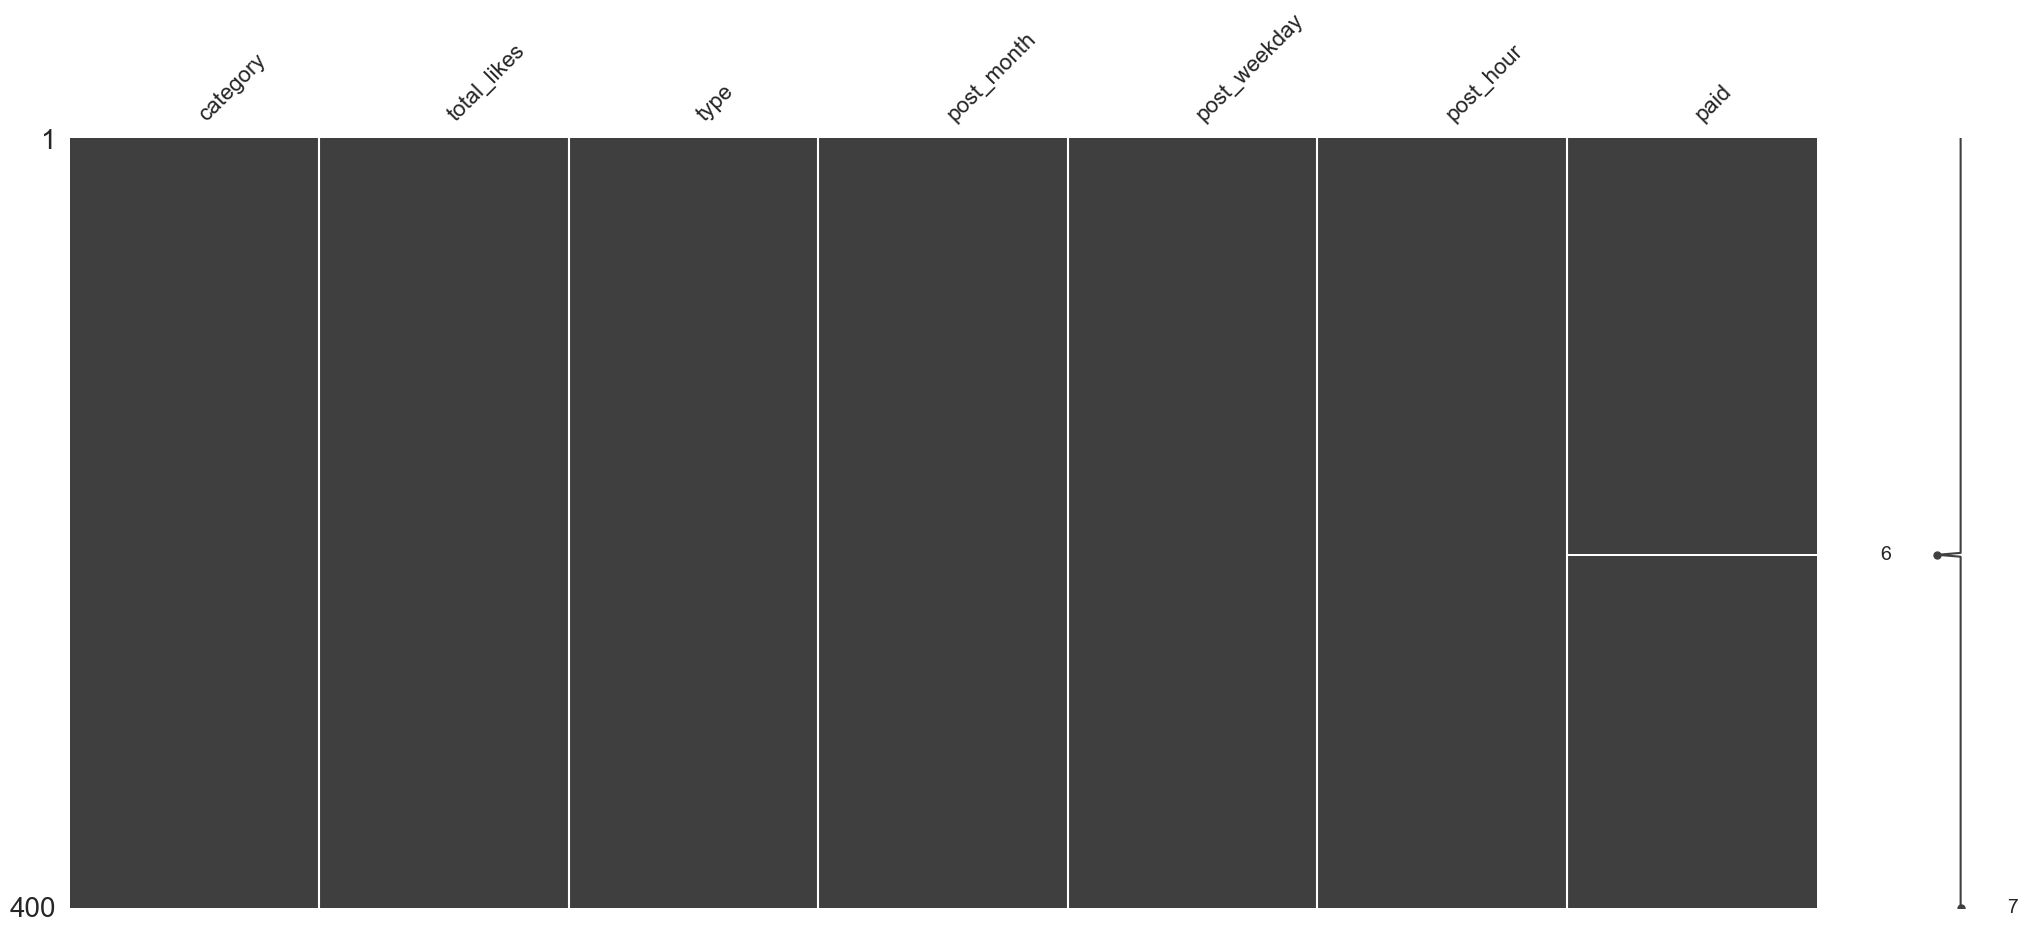

In [76]:
# Grafica de datos faltantes en los datos de entrada
msno.matrix(X_train)

In [77]:
# Transformaciones a factores categóricos de entrada
catOHE_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')), ('OneHotE', OneHotEncoder())])

In [78]:
# Transformación y normalización de los datos númericos
num_pipeline = Pipeline(steps = [('impPromedio', SimpleImputer(strategy='mean')),
                                 ('log', FunctionTransformer(np.log)),
                                 ('scalar', MinMaxScaler(feature_range=(0,1)))])

In [79]:
# Transformación y normalización de los datos ordinales
ord_pipeline = Pipeline(steps = [('impPromedio', SimpleImputer(strategy='most_frequent')),
                                 ('log', FunctionTransformer(np.log)),
                                 ('scalar', MinMaxScaler(feature_range=(0,1)))])

In [80]:
# Conjuntamos las transformaciones numéricas, binarios, categóricas y ordinales que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [
                                                        ('numpipe', num_pipeline, df_name_num),
                                                        ('catohecat', catOHE_pipeline, df_name_cate),
                                                        ('catohebin', catOHE_pipeline, df_name_bin),
                                                        ('ordpipe', ord_pipeline, df_name_ord),
                                                    ])

# **Ejercicio-5.**

Utiliza la función Dummy para modelos de regresión de scikit-learn con el conjunto que tienes de datos de entrenamiento y validación. Para ello particiónalos en 100 para validación y 300 para  entrenamiento. Encuentra los errores RMSE, MAE y MAPE para los conjuntos de entrenamiento y  validación. Estos serán tus errores máximos que deberás tomar como referencia en el resto de la  actividad. Consulta su documentación correspondiente: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html

In [81]:
# Creamos nuestros datos de validación con la función trains_test_split
X_train300, X_val, y_train300, y_val = train_test_split(X_train, y_train, train_size=0.75, random_state=10)

print("Tamaño del conjunto de entrada para Entrenamiento y Validación: ", X_train300.shape)
print("Tamaño del conjunto de entrada para Prueba: ", X_val.shape)
print("-----")
print("Tamaño del conjunto de salida para Entrenamiento y Validación: ", y_train300.shape)
print("Tamaño del conjunto de salida para Prueba: ", y_val.shape)

Tamaño del conjunto de entrada para Entrenamiento y Validación:  (300, 7)
Tamaño del conjunto de entrada para Prueba:  (100, 7)
-----
Tamaño del conjunto de salida para Entrenamiento y Validación:  (300, 1)
Tamaño del conjunto de salida para Prueba:  (100, 1)


In [82]:
# Entrenamiento del modelo regresor ficticio
dummy_reg = DummyRegressor(strategy='mean')

pipeline = Pipeline(steps=[('ct', columnasTransformer),('m', dummy_reg)])
pipeline.fit(X_train300, y_train300)
y_pred300 = pipeline.predict(X_train300)
y_pred = pipeline.predict(X_val)

In [109]:
# Cálculo del RMSE de los datos de entrenamiento 
mi_rmse = rmse(y_train300["lpe"], y_pred300)
print(f"Valor de la predicción de los datos de entrenamiento RMSE: {mi_rmse}")

Valor de la predicción de los datos de entrenamiento RMSE: 601.7656388680084


In [84]:
# Cálculo del RMSE de los datos de validación
mi_rmse = rmse(y_val["lpe"], y_pred)
print(f"Valor de la predicción de los datos de validación RMSE: {mi_rmse}")

589.9812895997447


In [85]:
# Cálculo del RMSE de los datos de entrenamiento 
mi_mae = mae(y_train300["lpe"], y_pred300)
print(f"Valor de la predicción de los datos de entrenamiento MAE: {mi_rmse}")

378.2526888888888


In [86]:
# Cálculo del RMSE de los datos de validación
mi_mae = mae(y_val["lpe"], y_pred)
print(f"Valor de la predicción de los datos de validación MAE: {mi_rmse}")

407.8993333333333


In [88]:
# Cálculo del RMSE de los datos de entrenamiento
mi_mape = mape(y_train300["lpe"], y_pred300)
print(f"Valor de la predicción de los datos de entrenamiento MAPE: {mi_rmse}")

133.1394242460052


In [87]:
# Cálculo del RMSE de los datos de validación
mi_mape = mape(y_val["lpe"], y_pred)
print(f"Valor de la predicción de los datos de validación MAPE: {mi_rmse}")

170.51900302908757


# **Ejercicio-6.**

Usando los modelos de regresión lineal múltiple, el bosque aleatorio y el perceptrón multicapa con  sus valores predeterminados, lleva a cabo su entrenamiento con repeticiones de validación cruzada (RepeatedKFold) y desplegando los errores RMSE, MAE y MAPE. Recuerda evitar el filtrado de información usando los datos que obtuviste en el ejercicio 2. Incluye las conclusiones sobre el mejor modelo encontrado en esta primera aproximación. En particular ¿hay alguno sobreentrenado o subentrenado? NOTA: Recuerda que puedes aumentar en dado caso el número máximo de iteraciones para que todos los modelos converjan.

In [103]:
# Función para obtener las configuraciones de los modelos
def get_models():
  modelos = list()
  nombres = list()

  # LR - Modelo de Regresion Logistica
  modelos.append(LinearRegression())
  nombres.append('Regresión lineal')

  # RF - Modelo de Bosque Aleatorio
  modelos.append(RandomForestRegressor())
  nombres.append('Bosque Aleatorio')

  # MLP - Modelo de Red Nuronal Multicapa
  modelos.append(MLPRegressor(max_iter=20000))
  nombres.append('Red Neuronal Multicapa')

  return modelos, nombres

In [104]:
# Entrenamiento del modelov y cargamos los modelos a comparar
modelos, nombres = get_models()
resultados = list()

for i in range(len(modelos)):
    # Parametros del Modelo
    pipeline = Pipeline(steps=[('ct', columnasTransformer), ('m', modelos[i])])

    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    # cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
    mis_metricas ={'rmsee':make_scorer(rmse),
                   'mae':make_scorer(mae),
                   'mape':make_scorer(mape)}


    # Entrenamiento del modelo 
    scores = cross_validate(pipeline, X_train, np.ravel(y_train), scoring = mis_metricas, cv=kfold)
    resultados.append(scores)

    print('%s:\nRMSE: %.3f\nMAE: %.3f\nMAPE: %.3f\n' % (nombres[i],
                                                          np.mean(scores['test_rmsee']),
                                                          np.mean(scores['test_mae']),
                                                          np.mean(scores['test_mape']),
                                                       ))

Linear Regression:
RMSE: 505.258
MAE: 305.558
MAPE: 110.863

Bosque Aleatorio:
RMSE: 549.331
MAE: 338.235
MAPE: 112.490

Red Neuronal Multicapa:
RMSE: 506.966
MAE: 309.405
MAPE: 113.016



### Conclusiones

--------

# **Ejercicio-7.**

Obtener los diagramas de caja y bigote para los errores MAPE de los conjuntos de validación obtenidos. En particular compara estos primeros resultados de MAPE con el mejor resultado que  encuentran los autores del artículo citado al inicio. Incluye tus conclusiones.

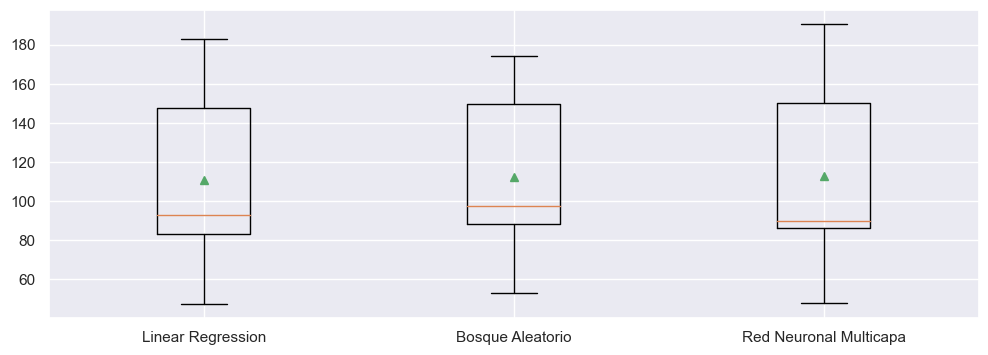

In [106]:
# Diagrama de bigotes de los tres modelos de acuerdo con los resultados de su MAPE
bpRecall = list()
for i in range(len(resultados)):
  MAPE_metric = resultados[i]['test_mape']
  bpRecall.append(MAPE_metric)

plt.boxplot(bpRecall, labels=nombres, showmeans=True)
plt.show()


### Conclusiones
-------------------------------

# **Ejercicio-8.**

Usando una búsqueda de malla con validación cruzada (GridSearchCV), busca los mejores hiperparámetros para el modelo MLP. Al menos deberás realizar la búsqueda en los  hiperparámetros “hidden_layer_sizes”, “alpha” y “learning_rate_init”. Además aplica la validación  cruzada con repeticiones (RepeatedKFold). Muestra los mejores hiperparámetros encontrados. 

In [92]:
None

# **Ejercicio-9.**

Con los mejores valores de los hiperparámetros encontrados realiza un análisis de la importancia de los factores. Muestra un diagrama de barras de los resultados e incluye tus conclusiones.

In [93]:
None

# **Ejercicio-10.**

Repite el ejercicio 8 y 9 para el modelo de bosque aleatorio para buscar sus mejores hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de  factores con este modelo con un diagrama de barras. 

In [94]:
None

# **Ejercicio-11.**

Repite el ejercicio 8 y 9 para el modelo de regresión lineal múltiple para buscar sus mejores hiperparámetros (realiza la búsqueda con aquellos hiperparámetros que consideres más adecuados) y usando el conjunto de Prueba. Y realiza igualmente el análisis de importancia de factores con este modelo con un diagrama de barras. 

In [95]:
None

# **Ejercicio-12.**

Compara tus resultados con los obtenidos por los autores del artículo de Moro-Rita-Vala con respecto a MAPE. Incluye tus conclusiones finales de la actividad.

In [96]:
None

### **Fin de la Actividad de la semana 7.**